## Dates and Times

A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates as values. For example, date of birth ('29-08-1987', '12-01-2012'), or time of application ('2016-Dec', '2013-March').

Datetime variables can contain dates only, or time only, or date and time.

Typically, we would never work with a date variable as a categorical variable, for a variety of reasons:

- Date variables usually contain a huge number of individual categories, which will expand the feature space dramatically
- Date variables allow us to capture much more information from the dataset if preprocessed in the right way

In addition, often, date variables will contain dates that were not present in the dataset that we used to train the machine learning algorithm. In fact, will contain dates placed in the future respect to the dates present in the dataset we used to train. Therefore, the machine learning model will not know what to do with them, because it never saw them while being trained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,2500,C,Dec-2018,debt_consolidation,Feb-2019
1,30000,D,Dec-2018,debt_consolidation,Feb-2019
2,5000,D,Dec-2018,debt_consolidation,Feb-2019
3,4000,D,Dec-2018,debt_consolidation,Feb-2019
4,30000,C,Dec-2018,debt_consolidation,Feb-2019


In [3]:
data.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

In [6]:
data['issue_dt']=pd.to_datetime(data.issue_d)
data['last_pymnt_dt']=pd.to_datetime(data.last_pymnt_d)
data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


Text(0, 0.5, 'Disbursed Amount (US Dollars)')

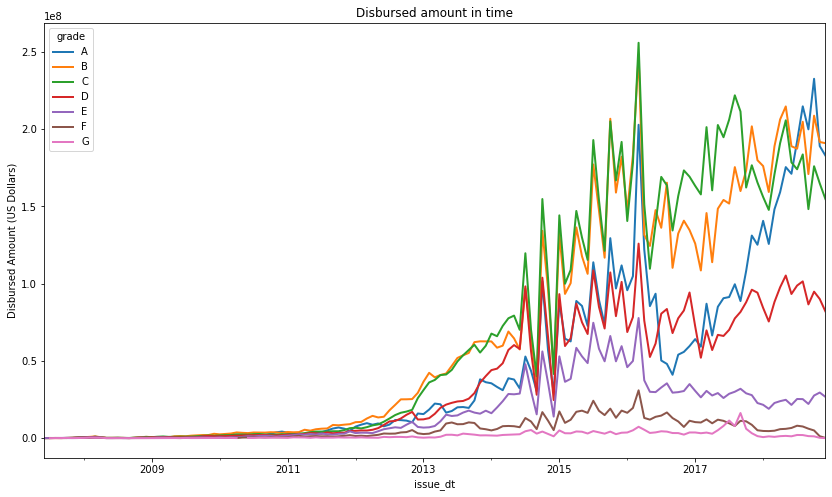

In [7]:
fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

Lending Club seems to have increased the amount of money lent from 2013 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, this is borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are typically charged lower interest rates.

E, F and G grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

Lending Club lends the biggest fraction to borrowers that intend to use that money to repay other debt or credit cards.